In [99]:
# import library 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
#import pandas_profiling

In [100]:
df = pd.read_csv('cardio_train.csv', sep=';')
df.head()

id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
0   0  18393       2     168    62.0  ...     1      0     0       1       0
1   1  20228       1     156    85.0  ...     1      0     0       1       1
2   2  18857       1     165    64.0  ...     1      0     0       0       1
3   3  17623       2     169    82.0  ...     1      0     0       1       1
4   4  17474       1     156    56.0  ...     1      0     0       0       0

[5 rows x 13 columns]

In [101]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

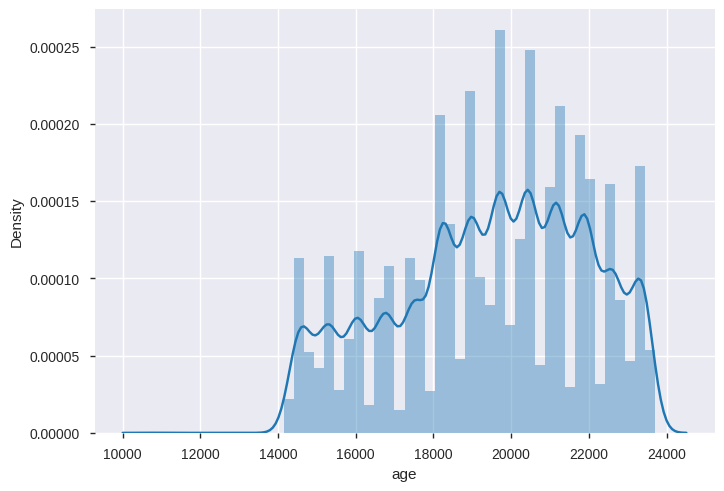

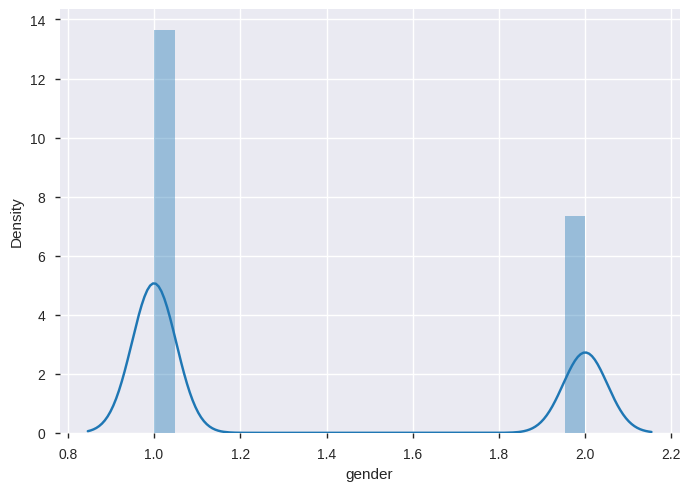

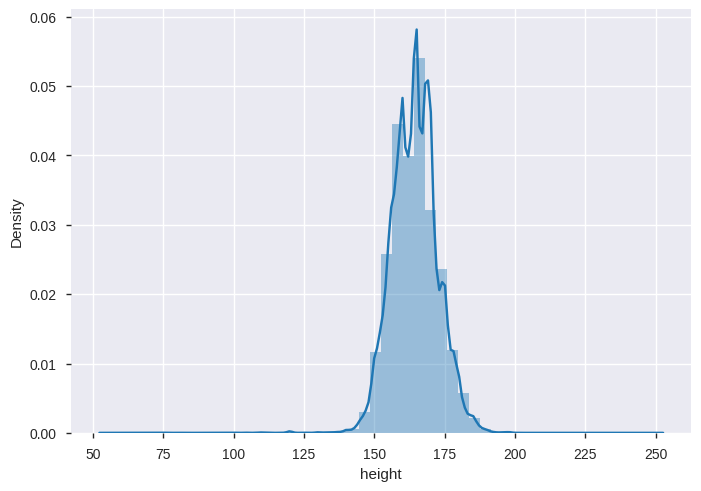

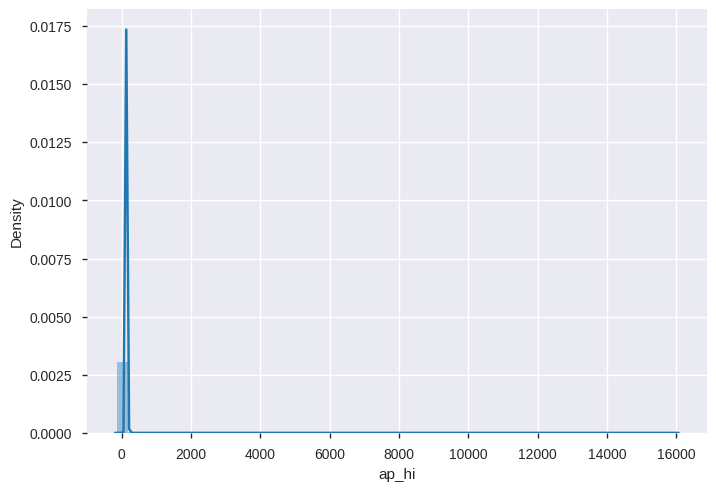

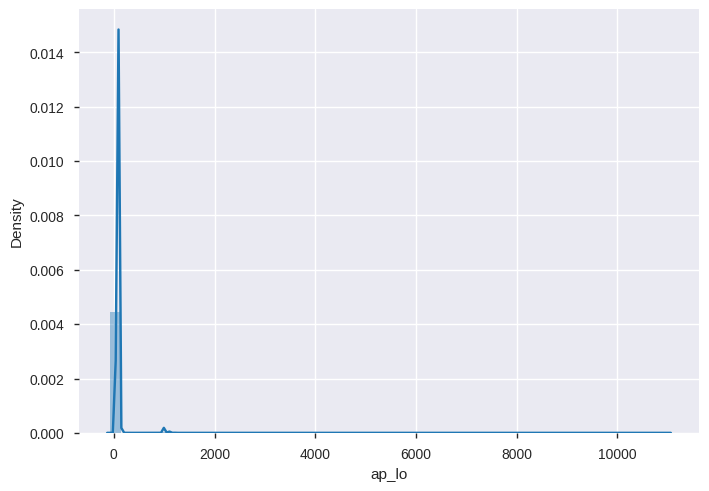

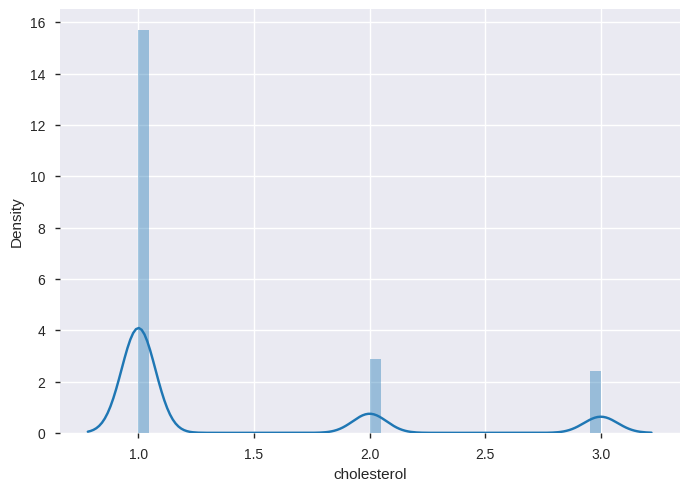

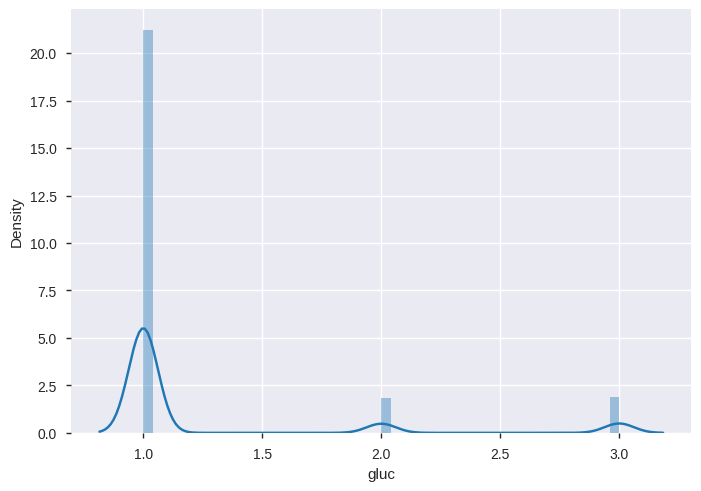

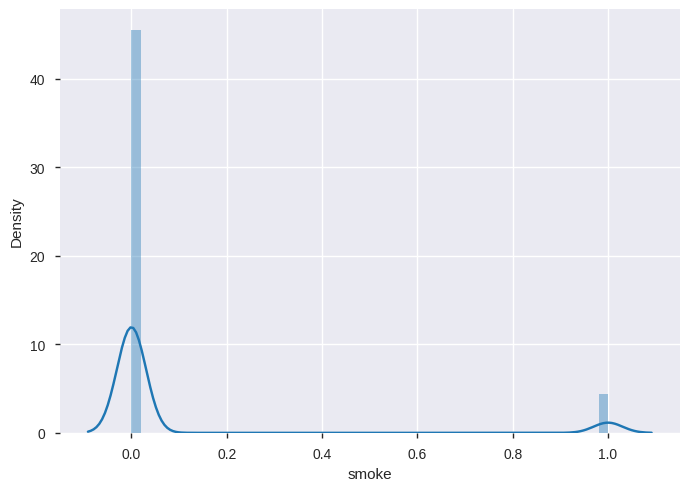

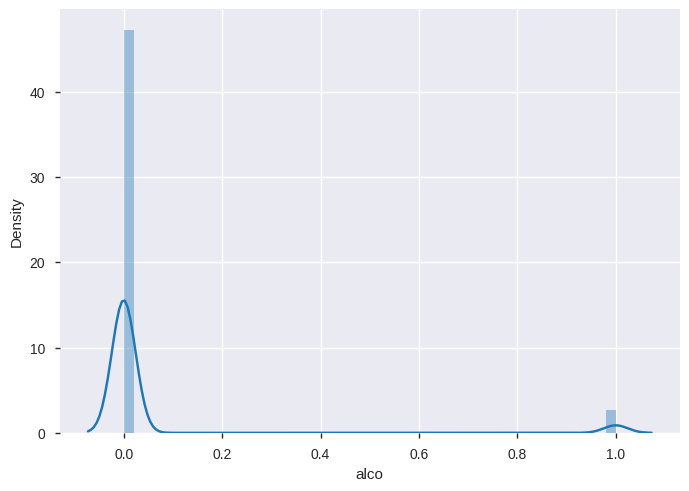

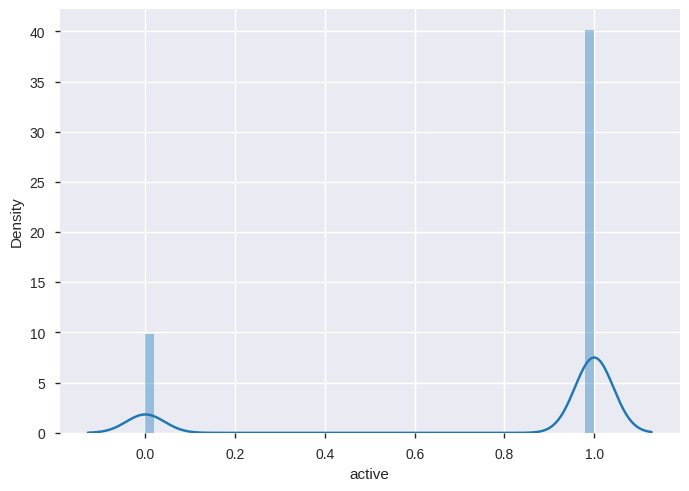

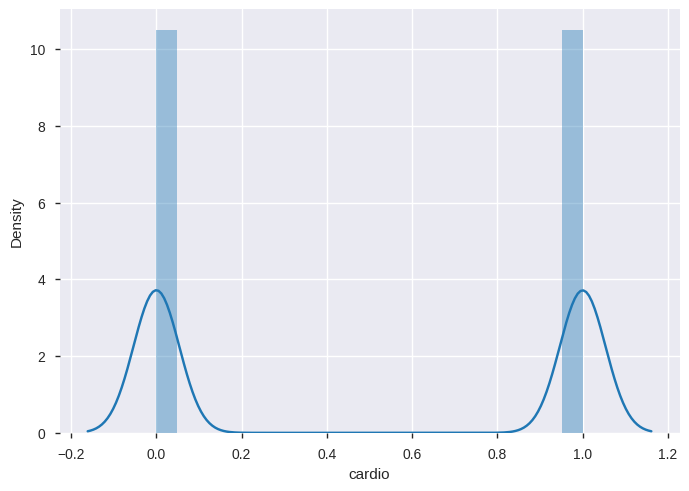

In [102]:
for col in df.iloc[:, 1:13].select_dtypes('int64'):
    plt.figure()
    #sns.displot(df, x=col, kind = 'kde')
    sns.distplot(df[col])

In [140]:
df_corr = df.iloc[:, 1:13]
df_corr
matrice_corr = df_corr.corr(method='spearman').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'))
matrice_corr

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score

X = df.drop(['cardio'], axis='columns')
y = df['cardio']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

rf = RandomForestClassifier(bootstrap=False, n_estimators=20,criterion='gini', max_depth=2, random_state=0)
rf.fit(X_train,  y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [104]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7174285714285714

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6994
           1       0.76      0.63      0.69      7006

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000



In [106]:
print("r2_score : " , r2_score(y_test, rf.predict(X_test)))

#print(len(rf.estimators))

r2_score :  -0.13028654470031875


Text(0.5, 0, 'Relative Importance')

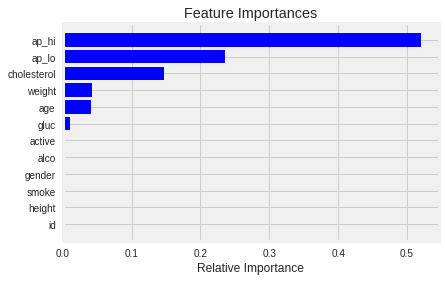

In [138]:
importances = rf.feature_importances_
indices = np.argsort(importances)
liste_invariables = list(df.columns)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_invariables[i] for i in indices])
plt.xlabel('Relative Importance')


In [120]:
# calcule du 3e quantile pour la pression sanguine
import statistics
Q3 = np.quantile(df['ap_lo'], 0.75)
print('pression sanguine quentile', Q3)
mediane = statistics.median(df['ap_lo'])
print(mediane)

pression sanguine quentile 90.0
80.0


In [125]:
X = [[53*365, 2, 175, 85.0, 128,90,2, 1, 1, 1, 0, 1]]
print(rf.predict(X))

[0]


On remarque que notre prédiction de Arthur qui n'as pas de problême cardio vasculaire

In [139]:
# Grid search 
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 25, 50, 75, 100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 29.3min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 71.4min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 80.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [141]:
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_bootstrap',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

### Avec standard Scaler